In [1]:
using PyPlot

In [2]:
e_rel = 1e-4
e_abs = 1e-4

0.0001

In [3]:
ε(ys...) = e_abs + e_rel * sum([abs(y) for y in ys])/length(ys)

ε (generic function with 1 method)

In [4]:
err(y, ŷ, ε) = sqrt(sum(((y - ŷ) / ε).^2)/length(y))

err (generic function with 1 method)

In [5]:
factor_min = 0.1
factor_max = 5
factor = 0.9
h_min = 1e-4

0.0001

In [6]:
h_opt(q, err, h) = max(h_min, 
                        h*min(factor_max,
                               max(factor_min, 
                                    err^(-1/(q+1)))))

h_opt (generic function with 1 method)

In [48]:
X0 = 0.
XF = 10.

Y0 = [1., 0.]

2-element Array{Float64,1}:
 1.0
 0.0

In [49]:
ε_0 = ε(Y0)

norm(y) = sum((y/ε_0).^2)/length(y)

norm (generic function with 1 method)

In [50]:
G = 10.
L = 5.

f(x, y) = [-1*y[2]*G/L, y[1]]

f (generic function with 1 method)

In [115]:
euler_step(x, h, y) = (y .+ f(x, y) * h, y)

euler_step (generic function with 1 method)

In [116]:
function constant_step(method; step_size = 1e-4)
    return Dict(
    :starting => step_size,
    :next_step => function(x, y, h)
        y, _ = method(x, h, y)
        return (x + h, y, h)
    end)
end

constant_step (generic function with 1 method)

In [117]:
function iterate(iteration_step)
    x = X0
    y = Y0
    h = iteration_step[:starting]
    Xs = Array{typeof(x)}([])
    Ys = Array{typeof(y)}([])
    while x < XF
        push!(Xs, x)
        push!(Ys, y)
        x, y, h = iteration_step[:next_step](x, y, h)
    end
    return (Xs, hcat(Ys...))
end

iterate (generic function with 1 method)

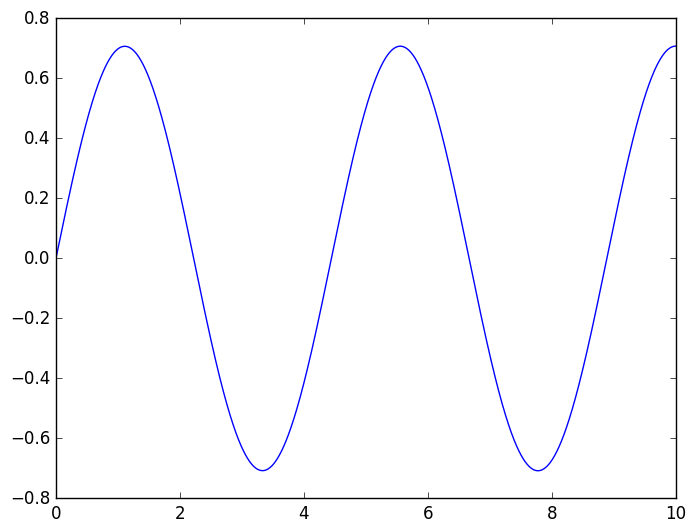

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0c46347eb8>

In [118]:
x, y = iterate(constant_step(euler_step))
plot(x, reshape(y[2, :], size(x)))

In [121]:
R38_Y = [1/3., 2/3., 1]
R38_X = Array[
    [1/3.],
    [-1/3., 1.],
    [1., -1., 1.],
    [1/8., 3/8., 3/8., 1/8.],
    [1/12., 1/2., 1/4., 0., 1/6.]
];

In [195]:
function array_step(arr_y, arr_x)
    return function(x, h, y)
        K = []
        push!(K, h .* f(x, y))
        for ind in range(1, length(arr_y))
            h_param = arr_y[ind]
            y_params = arr_x[ind]
            y_ = y
            for y__ in  zip(K, y_params)
                y_ = y_ .+ y__[1] .* y__[2]
            end
            k = h .* f(x + h * h_param, y_)
            push!(K, k)
        end
        y_n = y
        arr_x_len = length(arr_x)
        #@show(K, arr_x[arr_x_len - 1], sum(arr_x[arr_x_len - 1] .* K), y_n)
        y_n1 = y_n .+ sum(arr_x[arr_x_len - 1] .* K)
        @show(sum(arr_x[arr_x_len] .* K))
        yd = y_n1 .+ sum(arr_x[arr_x_len] .* K)
        return (y_n1, y_d)
    end
end

array_step (generic function with 1 method)

In [196]:
array_step(R38_Y, R38_X)(X0, 1e-4, Y0)

LoadError: LoadError: DimensionMismatch("arrays could not be broadcast to a common size")
while loading In[196], in expression starting on line 1

In [135]:
x, y = iterate(constant_step(array_step(R38_Y, R38_X)))
plot(x, reshape(y[2, :], size(x)))

LoadError: LoadError: MethodError: `*` has no method matching *(::Array{Float64,1}, ::Array{Float64,1})
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...)
  *{T<:Union{Complex{Float32},Complex{Float64},Float32,Float64},S}(!Matched::Union{DenseArray{T<:Union{Complex{Float32},Complex{Float64},Float32,Float64},2},SubArray{T<:Union{Complex{Float32},Complex{Float64},Float32,Float64},2,A<:DenseArray{T,N},I<:Tuple{Vararg{Union{Colon,Int64,Range{Int64}}}},LD}}, ::Union{DenseArray{S,1},SubArray{S,1,A<:DenseArray{T,N},I<:Tuple{Vararg{Union{Colon,Int64,Range{Int64}}}},LD}})
  *{TA,TB}(!Matched::Base.LinAlg.AbstractTriangular{TA,S<:AbstractArray{T,2}}, ::Union{DenseArray{TB,1},DenseArray{TB,2},SubArray{TB,1,A<:DenseArray{T,N},I<:Tuple{Vararg{Union{Colon,Int64,Range{Int64}}}},LD},SubArray{TB,2,A<:DenseArray{T,N},I<:Tuple{Vararg{Union{Colon,Int64,Range{Int64}}}},LD}})
  ...
while loading In[135], in expression starting on line 1